<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Logistic Regression with Python.***

Estimated time needed: **25** minutes

$ \ $

-----

# ***Objectives.***

After completing this lab you will be able to:

*   Use scikit Logistic Regression to classify.

*   Understand confusion matrix.


$ \ $

----

# ***Note (notebook).***

In this notebook, you will learn Logistic Regression, and then, you'll create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.


$ \ $

-----


## ***Table of contents.***

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="https://#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#practice">Practice</a></li>
    </ol>
</div>
<br>



$ \ $

---

## ***Remember (linear regression).***


As you know, $\color{aquamarine}{\text{Linear regression}}$ finds a function that relates a continuous dependent variable $y$, to some predictors or independent variables $x_{1}, x_{2},\dots,x_{n}$. In fact,  the linear regression assumes a function of the form:


$$y = h_{\theta}(X) = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots  \theta_n x_n$$

where the values of parameters $\theta_0, \theta_1, \theta_2, \dots,\theta_{n}$ are chosen in such a way that the error between the real data and the predictive linear data is minimum. Also, the previous function can be written as:

$$y = h_{\theta}(X) = \theta^{T} X.$$


$ \ $

----

## ***Definition (logistic regression / linguistics).***

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable $y$ is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.



$ \ $

-----


## ***Note (following definition - sigmoide function)***

In the following definition we will use the sigmoid function $\sigma:\mathbb{R} \longrightarrow (0,1)$ given by:

$ \ $

$$\sigma(x)=\dfrac{1}{1+e^{-x}}=\dfrac{e^{x}}{1+e^{x}}.$$


$ \ $

The graph of this function is $\color{yellow}{ s-shaped }$ curve.


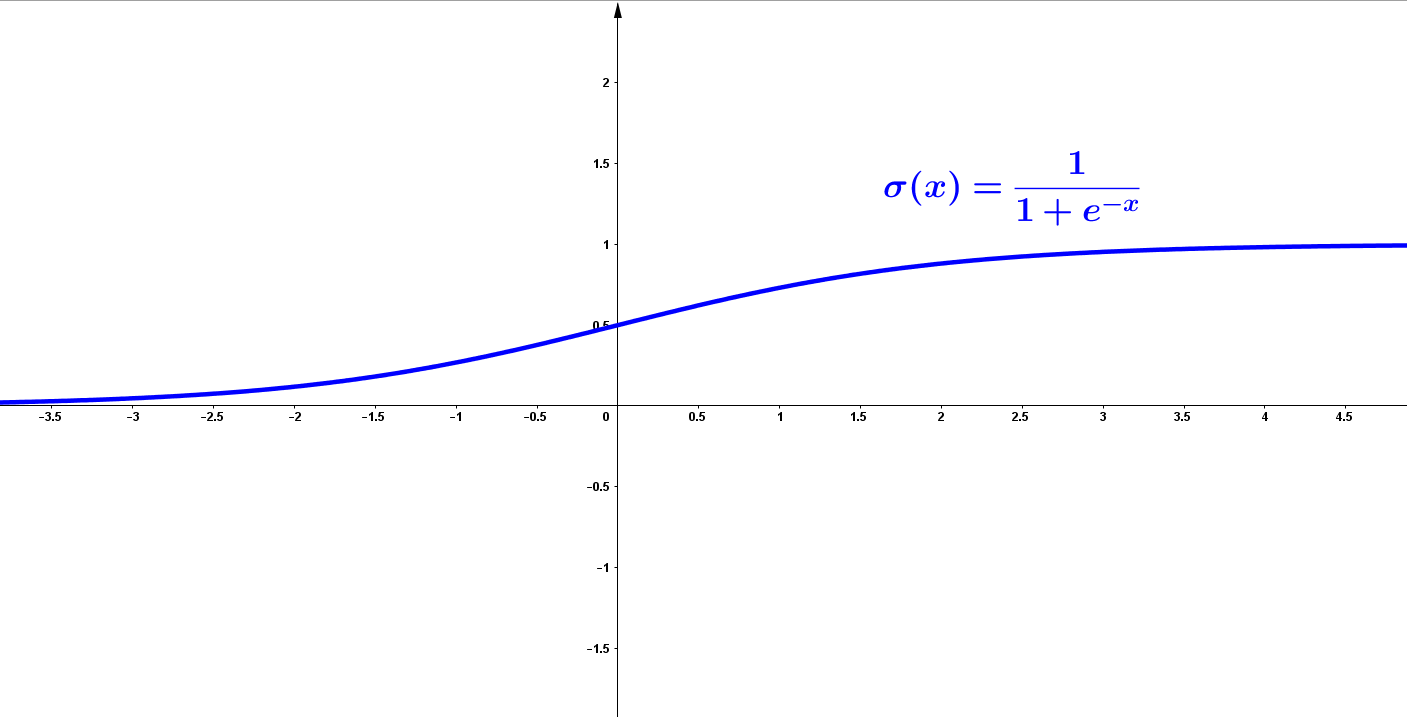

$ \ $

----

## ***Definition (logistic regression / mathematical).***

The $\color{aquamarine}{\text{logistic regression}}$ is the function $h_{\theta}:A\subseteq \mathbb{R}^{n+1} \longrightarrow (0,1)$  defined  by composing the linear regression and the sigmoid function as shown below.

$$h_{\theta}(X) = \sigma({\theta^{T}X}) =  \frac{e^{\theta^{T}X}}{1+e^{\theta^{T}X}} = \dfrac {e^{\theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots + \theta_n  x_n}}{1 + e^{\theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots + \theta_n  x_n}}.$$

This function describes a probability function since its range is $(0,1)$. Also, in some cases we write this function as:

$$P(Y=1|X) :=h_{\theta}(X) = \frac{e^{\theta^{T}X}}{1+e^{\theta^{T}X}}.$$



$ \ $

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

$ \ $

The objective of the $\color{aquamarine}{\text{Logistic Regression algorithm}}$, is to find the best parameters $\theta$, for 

$$h_{\theta}(X) = \sigma({\theta^TX})$$

in such a way that the model best predicts the class of each case.

$ \ $

----

## ***Natural Question (linear regression and logistic regression).***

$$\fbox{What is the mean difference between $\color{aquamarine}{linear \ regression}$ and $\color{yellow}{logistic \ regression?}$ }$$

While $\color{aquamarine}{\text{linear regression}}$ is suited (adecuada) for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting categorical values. In order to estimate categorical values, we need some sort of guidance (guia) on what would be the <b>most probable class</b> for categorical values. For this, we will use $\color{yellow}{\text{logistic regression}}$.




$ \ $

----

## ***Customer churn (rotaciones de clientes) with logistic regression.***

$ \ $

A telecommunications company is concerned about the number of customers leaving their (land-line) business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

$ \ $

Let's first import required libraries:


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

$ \ $

----

## ***About the dataset.***


We will use a telecommunications dataset for predicting customer churn (rotaciones de clientes). This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights (descubrir ideas) you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

$ \ $

The dataset includes information about:

$ \ $

$\color{aquamarine}{(1)}$   Customers who left within the last month – the column is called Churn.

$ \ $

$\color{aquamarine}{(2)}$    Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

$ \ $

$\color{aquamarine}{(3)}$    Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

$ \ $

$\color{aquamarine}{(4)}$    Demographic info about customers – gender, age range, and if they have partners and dependents.


$ \ $

----

## ***Load the Telco Churn data.***

`Telco Churn` is a hypothetical data file that concerns (preocupar - tener que ver con) a telecommunications company's efforts to reduce turnover (rotacion) in its customer base. Each case corresponds to a separate customer and it records (registro) various demographic and service usage information. Before you can work with the data, you must use the URL to get the ***ChurnData.csv***.

$ \ $

To download the data, we will use `!wget` to download it from IBM Object Storage.


In [ ]:
#Click here and press Shift+Enter
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv


--2022-12-30 14:03:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.03s   

2022-12-30 14:03:51 (1.00 MB/s) - ‘ChurnData.csv’ saved [35943/35943]



$ \ $

----

## ***Load Data From CSV File.***

We load the data in the variable churn_df.


In [ ]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


$ \ $

----

## ***Data pre-processing and selection.***


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


In [ ]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


$ \ $

----

# ***Practice.***

$ \ $

$(1)$ How many rows and columns are in this dataset in total? What are the names of columns?


In [ ]:
columns = list(churn_df.columns)
shape = churn_df.shape

print(f"The DataFrame has {shape[0]} rows and {shape[1]} columns")
print(" ")
print("The columns of the DataFrame are: " , columns)


The DataFrame has 200 rows and 10 columns
 
The columns of the DataFrame are:  ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']


$ \ $

$(2)$ Let's define $x$ and $y$ for our dataset:


In [ ]:
churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [ ]:
churn_df['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
x = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [ ]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

$ \ $

$(3)$ Also, we normalize the dataset:


In [ ]:
#(1) El paquete de "preprocessing" proporciona varias funciones de utilidad comunes y clases de transformadores para cambiar los vectores (arrays) de características sin procesar en una representación que sea más adecuada para los estimadores posteriores.
from sklearn import preprocessing

#(2) se usa en los datos de entrenamiento para que podamos escalar los datos de entrenamiento y también aprender los parámetros de escala de esos datos 
x = preprocessing.StandardScaler().fit(x).transform(x)

#(3) mostramos en pantalla los 5 primeros resultados (vectores)
x[0:5]


array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

$ \ $

----

## ***(Train/Test) dataset.***


We split our dataset into train and test set:


In [ ]:
#(1) train_test_split es una funcion de sklearn. El paquete model_selection en Python divide arreglos o matrices en subconjuntos aleatorios para entrenar y probar datos.
from sklearn.model_selection import train_test_split

#(2) usamos la funcion train_test_split sobre la data (x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#(3) mostramos en pantalla los tamaños de los resultados obtenidos en la función anterior
print("Train set:", x_train.shape,  y_train.shape)
print("Test set:", x_test.shape,  y_test.shape)


Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


$ \ $

-----

## ***Modeling (logistic regression with Scikit-learn).***

$ \ $

$(\checkmark)$ Let's build our model using $\color{aquamarine}{\text{LogisticRegression}}$ from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including 

* "newton-cg"

* "lbfgs"

* "liblinear’"

* "sag’" 

* "saga" solvers 


$(\checkmark)$ You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

$ \ $

$(\checkmark)$ The version of $\color{aquamarine}{\text{LogisticRegression}}$ in Scikit-learn, support $\color{yellow}{\text{regularization}}$. Regularization is a technique used to solve the overfitting problem (problema de sobreajuste) of machine learning models.

$ \ $

$(\checkmark)$ $\color{yellow}{\text{C - parameter}}$ indicates **inverse of regularization strength** (inversa de la fuerza de regularización) which must be a positive float. Smaller values specify stronger regularization.

$ \ $

$(1)$ Now let's fit our model with train set:


In [ ]:
#(1) importamos la funcion LogisticRegression de sklearn. La regresión logística es un algoritmo de clasificación de machine learning que se utiliza para predecir la probabilidad de una variable dependiente categórica . En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.)
from sklearn.linear_model import LogisticRegression


#(2) usamos la funcion LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
LR


LogisticRegression(C=0.01, solver='liblinear')

$ \ $

$(2)$ Now we use the function $\color{yellow}{\text{predict}}$ over test set to produce a prediction (possible approximation of a solution).


In [ ]:
help(LR.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._logistic.LogisticRegression instance
    Predict class labels for samples in X.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data matrix for which we want to get the predictions.
    
    Returns
    -------
    y_pred : ndarray of shape (n_samples,)
        Vector containing the class labels for each sample.



In [ ]:
y_hat = LR.predict(x_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

$ \ $

$(3)$ The function $\color{yellow}{\text{predict_proba}}$  returns estimates for all classes, ordered by the label of classes such as:

* The first column is the probability of class 0 denoted by $P(y=0|x)$.

* The second column is probability of class 1 denoted by $P(y=1|x)$.


In [ ]:
yhat_prob = LR.predict_proba(x_test)
# yhat_prob

$ \ $

----


## ***Jaccard index.***

Let's try the $\color{aquamarine}{\text{jaccard index}}$ for accuracy  evaluation (evaluar la precisión). We can define jaccard as 

$ \ $

$\fbox{the size of the intersection divided by the size of the union of the two label sets.} = \dfrac{|A \cap B|}{|A\cup B|}.$

$ \ $


$$\text{Accuracy}=\begin{cases} 
1 \ &\text{If} \ \text{the entire set of predicted labels for a sample strictly matches with the true set of labels,}\\ \\
0 \ &\text{Otherwise.}
\end{cases}$$


In [ ]:
#(1) Importamos la funcion jaccard_score definida previamente. Esta funcion se encuentra en la biblioteca de machine learning sklearn
from sklearn.metrics import jaccard_score

#(2) Mostramos en pantalla la descripcion de esta funcion
# help(jaccard_score)

In [ ]:
#(1) Importamos la funcion jaccard_score definida anteriormente. Esta funcion se encuentra en la libreria de machine learning sklearn
from sklearn.metrics import jaccard_score

#(2) usamos la funcion jaccard_score
jaccard_score(y_test, y_hat, pos_label = 0)


0.7058823529411765

$ \ $

----

## ***Confusion matrix.***

Another way of looking at the accuracy of the classifier is to look at $\color{aquamarine}{\text{confusion matrix}}$.


In [ ]:
#(1) Importamos las funciones classification_report, confusion_matrix de la libreria de machine learning sklearn
from sklearn.metrics import classification_report, confusion_matrix

#(2) Itertools es un módulo en Python, se usa para iterar sobre estructuras de datos que se pueden pasar por alto usando un bucle for . Estas estructuras de datos también se conocen como iterables. Este módulo funciona como una herramienta rápida y eficiente en memoria que se usa solo o en combinación para formar álgebra de iteración.
import itertools

#(3) definimos la funcion que describe la matriz de confusion llamada plot_confusion_matrix
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):

    #(3.1) Describimos los rasgos de la funcion que aparecen cuando le preguntamos a Python que significa esta funcion usando help()
    """Esta función imprime y traza la matriz de confusión. La normalización se puede aplicar estableciendo `normalize=True`."""


    if normalize == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize == True: 
      fmt = '.2f' 
    else:
      fmt = 'd'

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


print(confusion_matrix(y_test, y_hat, labels=[1,0]))


[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


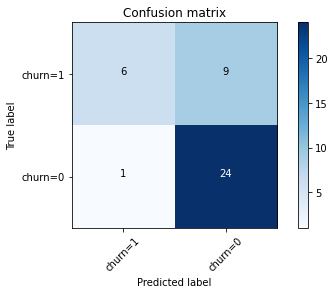

In [ ]:
#(1) Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


#(2) Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], normalize= False,  title='Confusion matrix')


$ \ $


$(\checkmark)$ The first row is for customers whose actual churn value (valor de abandono) in the test set is 1.
As you can calculate, we have that:

* Out of 40 customers, the churn value (valor de abandono) of 15 of them is 1. 

* Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. This means, for 6 customers, the actual churn value (valor de abandono) was 1 in test set and classifier also correctly predicted those as 1. 

* However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

$ \ $

$(\checkmark)$ The second row is for customers whose actual churn value (valor de abandono) in the test set is 0. As you can calculate, we have that:

* Out of 40 customers, the churn value (valor de abandono) of 25 of them is 0. 

* The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. 

$ \ $

A good thing about the $\color{aquamarine}{\text{confusion matrix}}$ is that it shows the model’s ability to correctly predict or separate the classes.  In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.


In [ ]:
# help(classification_report)
print("classification_report es una funcion crea un informe de texto que muestra las principales métricas de clasificación.")

classification_report es una funcion crea un informe de texto que muestra las principales métricas de clasificación.


In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



$ \ $  

Based on the count of each section, we can calculate precision and recall of each label:

*   $\color{aquamarine}{\text{Precision}}$ is a measure of the accuracy provided that a class label has been predicted and it is defined as  $$\color{aquamarine}{\text{Precision}} =  \dfrac{TP}{TP+FP}$$

*   $\color{yellow}{\text{Recall}}$ is the true positive rate and  is defined as $$\color{yellow}{\text{Recall}} =  \dfrac{TP}{TP+FN}$$

* $\color{green}{F_{1} - \text{ score}}$ is the harmonic average of the precision and recall. It  reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.




$ \ $

----

## ***Logistic regression and Log loss.***

In logistic regression we have that:

* The output can be the probability of customer churn (rotación de clientes) is yes (or equals to 1). 

* This probability is a value between 0 and 1.

The $\color{aquamarine}{\text{log loss}}$ (logarithmic loss) is a function that measures the performance of classifier where the predicted output is a probability value between 0 and 1.


In [ ]:
#(1) importamos la funcion log_loss de la libreria de machine learning sklearn
from sklearn.metrics import log_loss

#(2) usamos la funcion log_loss sobre y_test  y  yhat_prob
log_loss(y_test, yhat_prob)

0.6017092478101185

$ \ $

----

## ***Practice.***

Try to build Logistic Regression model again for the same dataset, but this time, use different solver and regularization values.



In [ ]:
#(1) creamos el objeto de tipo regresion logistica con C - parameter  indicates inverse of regularization strength (inversa de la fuerza de regularización) 
logistc_regression = LogisticRegression(C = 0.01, solver='sag').fit(x_train, y_train)

#(2) usamos la funcion  predict_proba para obtener los valores de todas las clases
yhat_prob2 = (logistc_regression).predict_proba(x_test)

#(3) Mostramos en pantalla el resultado de log_loss sobre y_test y  yhat_prob2
print(f"LogLoss: : {log_loss(y_test, yhat_prob2)}")


LogLoss: : 0.6114059118818271
